In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#READING DATA TEXT
#df= pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_230318.txt', header=0) 

In [4]:
num_weeks = 9

start_date = filedate = pd.Timestamp('2022-06-04 00:00:00')

filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
# http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt
filelist = []

for numfiles in range(num_weeks):

    filedate_str = str(filedate.year)[2:4] + str(
        filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    df = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
    filelist.append(df)

    filedate += pd.Timedelta(days=7)

df = pd.concat(filelist, axis=0, ignore_index=True)

In [5]:
#SETTING COLUMNS NAMES
df.rename(columns={"EXITS                                                               " : "exits"}, inplace=True)
df.rename(columns={"STATION": "station"}, inplace=True)
df.rename(columns={"ENTRIES" : "entries"}, inplace=True)
df.rename(columns={"TIME" : "time"}, inplace=True)
df.rename(columns={"DATE" : "date"}, inplace=True)

In [6]:
df

,C/A,UNIT,SCP,station,LINENAME,DIVISION,date,time,DESC,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,00:00:00,REGULAR,7717669,2709039
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,04:00:00,REGULAR,7717677,2709047
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,08:00:00,REGULAR,7717692,2709080
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,12:00:00,REGULAR,7717724,2709155
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,16:00:00,REGULAR,7717838,2709208
...,...,...,...,...,...,...,...,...,...,...,...
1900788,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,05:00:00,REGULAR,0,804
1900789,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,09:00:00,REGULAR,0,804
1900790,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,13:00:00,REGULAR,0,804
1900791,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,17:00:00,REGULAR,0,804


In [7]:
df.dtypes

C/A                 object
UNIT                object
SCP                 object
station             object
LINENAME            object
DIVISION            object
date        datetime64[ns]
time                object
DESC                object
entries              int64
exits                int64
dtype: object

In [8]:
df

,C/A,UNIT,SCP,station,LINENAME,DIVISION,date,time,DESC,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,00:00:00,REGULAR,7717669,2709039
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,04:00:00,REGULAR,7717677,2709047
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,08:00:00,REGULAR,7717692,2709080
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,12:00:00,REGULAR,7717724,2709155
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,16:00:00,REGULAR,7717838,2709208
...,...,...,...,...,...,...,...,...,...,...,...
1900788,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,05:00:00,REGULAR,0,804
1900789,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,09:00:00,REGULAR,0,804
1900790,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,13:00:00,REGULAR,0,804
1900791,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,17:00:00,REGULAR,0,804


In [9]:
df['dates'] = pd.to_datetime(df['date'])
df.dtypes

C/A                 object
UNIT                object
SCP                 object
station             object
LINENAME            object
DIVISION            object
date        datetime64[ns]
time                object
DESC                object
entries              int64
exits                int64
dates       datetime64[ns]
dtype: object

In [10]:
df['weekday'] = df['dates'].dt.day_name()
df

,C/A,UNIT,SCP,station,LINENAME,DIVISION,date,time,DESC,entries,exits,dates,weekday
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,00:00:00,REGULAR,7717669,2709039,2022-05-28,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,04:00:00,REGULAR,7717677,2709047,2022-05-28,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,08:00:00,REGULAR,7717692,2709080,2022-05-28,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,12:00:00,REGULAR,7717724,2709155,2022-05-28,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,16:00:00,REGULAR,7717838,2709208,2022-05-28,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900788,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,05:00:00,REGULAR,0,804,2022-07-29,Friday
1900789,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,09:00:00,REGULAR,0,804,2022-07-29,Friday
1900790,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,13:00:00,REGULAR,0,804,2022-07-29,Friday
1900791,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,17:00:00,REGULAR,0,804,2022-07-29,Friday


In [11]:
df["turnstile"] = df["C/A"] + "-" + df["UNIT"] + "-" + df["SCP"]
#df["time"] = pd.to_datetime(df["DATE"] + " " + df["TIME"], format="%m/%d/%Y %H:%M:%S")
df

,C/A,UNIT,SCP,station,LINENAME,DIVISION,date,time,DESC,entries,exits,dates,weekday,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,00:00:00,REGULAR,7717669,2709039,2022-05-28,Saturday,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,04:00:00,REGULAR,7717677,2709047,2022-05-28,Saturday,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,08:00:00,REGULAR,7717692,2709080,2022-05-28,Saturday,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,12:00:00,REGULAR,7717724,2709155,2022-05-28,Saturday,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,16:00:00,REGULAR,7717838,2709208,2022-05-28,Saturday,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900788,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,05:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01
1900789,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,09:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01
1900790,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,13:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01
1900791,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,17:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01


In [12]:
df2=df.loc[df['entries'] > 0 , ["turnstile","time","station","entries","exits","weekday"]] #DROP ENTRIES COLUMNS < 0
df2

,turnstile,time,station,entries,exits,weekday
0,A002-R051-02-00-00,00:00:00,59 ST,7717669,2709039,Saturday
1,A002-R051-02-00-00,04:00:00,59 ST,7717677,2709047,Saturday
2,A002-R051-02-00-00,08:00:00,59 ST,7717692,2709080,Saturday
3,A002-R051-02-00-00,12:00:00,59 ST,7717724,2709155,Saturday
4,A002-R051-02-00-00,16:00:00,59 ST,7717838,2709208,Saturday
...,...,...,...,...,...,...
1900746,TRAM2-R469-00-05-00,05:00:00,RIT-ROOSEVELT,336786,0,Friday
1900747,TRAM2-R469-00-05-00,09:00:00,RIT-ROOSEVELT,336798,0,Friday
1900748,TRAM2-R469-00-05-00,13:00:00,RIT-ROOSEVELT,336824,0,Friday
1900749,TRAM2-R469-00-05-00,17:00:00,RIT-ROOSEVELT,336834,0,Friday


In [13]:
df2["entries_diff"] = df2["entries"].diff().fillna(0)
df2["exits_diff"] = df2["exits"].diff().fillna(0)
df2

,turnstile,time,station,entries,exits,weekday,entries_diff,exits_diff
0,A002-R051-02-00-00,00:00:00,59 ST,7717669,2709039,Saturday,0.0,0.0
1,A002-R051-02-00-00,04:00:00,59 ST,7717677,2709047,Saturday,8.0,8.0
2,A002-R051-02-00-00,08:00:00,59 ST,7717692,2709080,Saturday,15.0,33.0
3,A002-R051-02-00-00,12:00:00,59 ST,7717724,2709155,Saturday,32.0,75.0
4,A002-R051-02-00-00,16:00:00,59 ST,7717838,2709208,Saturday,114.0,53.0
...,...,...,...,...,...,...,...,...
1900746,TRAM2-R469-00-05-00,05:00:00,RIT-ROOSEVELT,336786,0,Friday,0.0,0.0
1900747,TRAM2-R469-00-05-00,09:00:00,RIT-ROOSEVELT,336798,0,Friday,12.0,0.0
1900748,TRAM2-R469-00-05-00,13:00:00,RIT-ROOSEVELT,336824,0,Friday,26.0,0.0
1900749,TRAM2-R469-00-05-00,17:00:00,RIT-ROOSEVELT,336834,0,Friday,10.0,0.0


In [14]:
#ent_diff & exts_diff columns turn float to obj
df2["entries_diff"]=df2["entries_diff"].astype(float)
df2["exits_diff"]=df2["exits_diff"].astype(float)

In [15]:
#"""1 kişi ort 4 saniyede geçiş yapar olarak hesapladım. 4 saatte yaklaşık 3500 kişi. bu değeri maks değer kabul edip
#üstünde olan değerleri aykırı değer varsayıyorum""" çıkış için 2 saniyede 1 kişi hesapladım ve 7200 maks sayısını buldum


df3= df2.loc[(df2["entries_diff"] >=0) & (df2["entries_diff"] < 3500) & (df2["exits_diff"] > 0) & (df2["exits_diff"] < 7200)]
df3

,turnstile,time,station,entries,exits,weekday,entries_diff,exits_diff
1,A002-R051-02-00-00,04:00:00,59 ST,7717677,2709047,Saturday,8.0,8.0
2,A002-R051-02-00-00,08:00:00,59 ST,7717692,2709080,Saturday,15.0,33.0
3,A002-R051-02-00-00,12:00:00,59 ST,7717724,2709155,Saturday,32.0,75.0
4,A002-R051-02-00-00,16:00:00,59 ST,7717838,2709208,Saturday,114.0,53.0
5,A002-R051-02-00-00,20:00:00,59 ST,7717947,2709229,Saturday,109.0,21.0
...,...,...,...,...,...,...,...,...
1900703,TRAM2-R469-00-03-01,01:00:00,RIT-ROOSEVELT,3232756,403487,Friday,9.0,3.0
1900704,TRAM2-R469-00-03-01,05:00:00,RIT-ROOSEVELT,3232756,403488,Friday,0.0,1.0
1900706,TRAM2-R469-00-03-01,13:00:00,RIT-ROOSEVELT,3232816,403496,Friday,53.0,8.0
1900707,TRAM2-R469-00-03-01,17:00:00,RIT-ROOSEVELT,3232910,403506,Friday,94.0,10.0


In [16]:
df5= df3.groupby(['station'])["entries_diff"].count().sort_values()
df5.duplicated().sum()

46

In [17]:
df3.dtypes

turnstile        object
time             object
station          object
entries           int64
exits             int64
weekday          object
entries_diff    float64
exits_diff      float64
dtype: object

In [18]:
station_entries = df3.groupby(["weekday"])["entries_diff"].count().sort_values()
station_entries


weekday
Saturday     186966
Sunday       223521
Monday       229695
Tuesday      232422
Wednesday    232868
Thursday     233156
Friday       233337
Name: entries_diff, dtype: int64

<Axes: xlabel='weekday', ylabel='entries_diff'>

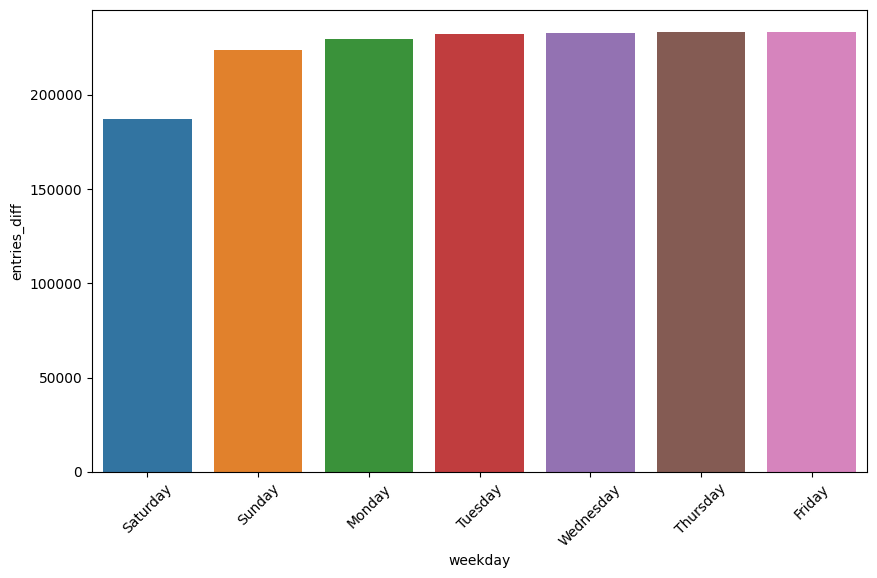

In [19]:
plt.figure(figsize = (10,6))
plt.xticks(rotation=45)
sns.barplot(x=station_entries.index , y=station_entries)

In [20]:
df3["time2"] = df3["time"].astype(str).str[:2]
df3["time2"].astype(int) 

C:\Users\ali_t\AppData\Local\Temp\ipykernel_8540\2350251446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["time2"] = df3["time"].astype(str).str[:2]


1           4
2           8
3          12
4          16
5          20
           ..
1900703     1
1900704     5
1900706    13
1900707    17
1900708    21
Name: time2, Length: 1571965, dtype: int32

In [21]:
crowded_hourly = df3.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)
crowded_hourly


time2
03      4610
23      6233
15      6436
07      6569
11      6810
19      6820
02      8691
06     10491
14     11149
10     11210
22     11335
18     11515
01     89317
05     97237
09    105119
13    105524
21    105966
17    106339
00    126477
04    138820
08    147714
12    148637
16    149386
20    149560
Name: entries_diff, dtype: int64

In [22]:
crowded_hourly2 = df3[df3["time2"].between("00","03")]
group_by_time04 =(crowded_hourly2.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly3 = df3[df3["time2"].between("04","07")]
group_by_time48 =(crowded_hourly3.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly4 = df3[df3["time2"].between("08","11")]
group_by_time812 =(crowded_hourly4.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly5 = df3[df3["time2"].between("12","15")]
group_by_time1216=(crowded_hourly5.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly6 = df3[df3["time2"].between("16","19")]
group_by_time1620 =(crowded_hourly6.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly7 = df3[df3["time2"].between("20","23")]
group_by_time2024 =(crowded_hourly7.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()


result={"Hours" : ["00-04","04-08","08-12","12-16","16-20","20-24"],
                    "intensity" :[group_by_time04,group_by_time48,group_by_time812,group_by_time1216,group_by_time1620,group_by_time2024]}
result
result2 =pd.DataFrame(data=result, index=[0,1,2,3,4,5])
result2

,Hours,intensity
0,00-04,229095
1,04-08,253117
2,08-12,270853
3,12-16,271746
4,16-20,274060
5,20-24,273094


<Axes: xlabel='Hours', ylabel='intensity'>

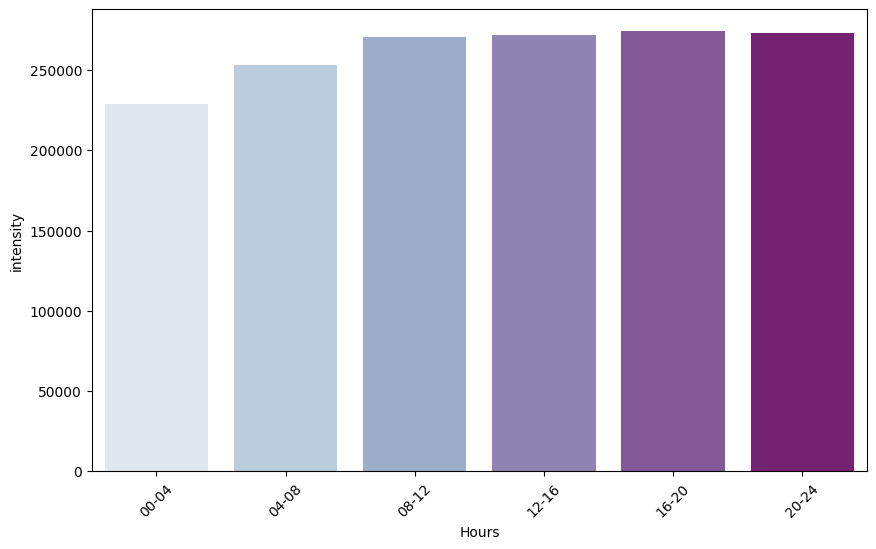

In [23]:
plt.figure(figsize = (10,6))
plt.xticks(rotation=45)
sns.barplot(x=result2["Hours"] , y=result2["intensity"] , palette = sns.color_palette("BuPu"))

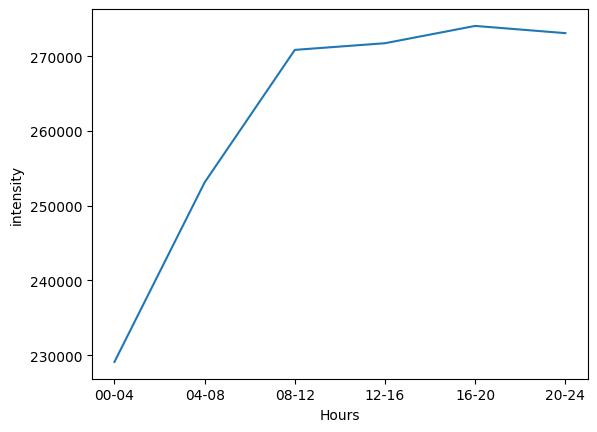

In [24]:
sns.lineplot(data = result2, x = "Hours" , y = 'intensity'); 

In [25]:
df['station'].drop_duplicates(inplace=True)
df['station']

0                  59 ST
1                  59 ST
2                  59 ST
3                  59 ST
4                  59 ST
               ...      
1900788    RIT-ROOSEVELT
1900789    RIT-ROOSEVELT
1900790    RIT-ROOSEVELT
1900791    RIT-ROOSEVELT
1900792    RIT-ROOSEVELT
Name: station, Length: 1900793, dtype: object

In [28]:
df5=df3.groupby(['station'])["entries_diff",'exits_diff'].
#df6=df3.groupby(['station'])['exits_diff'].mean()
#df7=pd.concat([df5,df6],axis=1).reset_index()
#df7= pd.merge(df5, df6, on='station').reset_index()
df5

C:\Users\ali_t\AppData\Local\Temp\ipykernel_8540\1281050994.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5=df3.groupby(['station'])["entries_diff",'exits_diff'].info()


AttributeError: 'DataFrameGroupBy' object has no attribute 'info'

In [ ]:
df5= df3.groupby(['station']).apply(lambda x: x.sort_values(['entries_diff'], ascending=False))
df5

turnstile      time    station   entries  \
station                                                                
1 AV      245433   H008-R248-01-00-04  20:00:00       1 AV    712854   
          245427   H008-R248-01-00-04  20:00:00       1 AV    711709   
          667836   H008-R248-01-00-04  20:00:00       1 AV    726974   
          1512710  H007-R248-00-00-01  20:00:00       1 AV  61673193   
          456822   H008-R248-01-00-04  20:00:00       1 AV    717912   
...                               ...       ...        ...       ...   
ZEREGA AV 820336   R419-R326-00-00-01  05:00:00  ZEREGA AV    285928   
          1243246  R419-R326-00-03-00  05:00:00  ZEREGA AV   1251237   
          1031790  R419-R326-00-00-00  05:00:00  ZEREGA AV    246220   
          397273   R419-R326-00-00-01  05:00:00  ZEREGA AV    283913   
          185729   R419-R326-00-00-00  05:00:00  ZEREGA AV    241260   

                      exits    weekday  entries_diff  exits_diff time2  
station                                                                 
1 AV      245433     101625   Thursday         448.0        33.0    20  
          245427     101464  Wednesday         437.0        38.0    20  
          667836     104021   Thursday         431.0        30.0    20  
          1512710  39134736   Thursday         423.0       308.0    20  
          456822     102529    Tuesday         419.0        35.0    20  
...                     ...        ...           ...         ...   ...  
ZEREGA AV 820336     501114     Monday           0.0         4.0    05  
          1243246    596488     Monday           0.0         1.0    05  
          1031790   1045430   Saturday           0.0        43.0    05  
          397273     495790   Saturday           0.0        16.0    05  
          185729    1020824   Saturday           0.0        37.0    05  

[1571965 rows x 9 columns]

In [ ]:
df.groupby('kategori').apply(lambda x: x.sort_values(['değer'], ascending=False))
